In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output
import pandas as pd

In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [3]:
# Set filepath
REPOSITORY='/home/ebb505/ARE_Project/are-logs/temp_0808/'
FILENAMEDESC='MD_Cart_WDH.csv'
FILENAMETESTS='tests.csv'
AREPUCKFILEPATH='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Puck/'+FILENAMEDESC
AREPOTATOFILEPATH='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Potato/'+FILENAMEDESC
ARETRICYCLEFILEPATH='/home/ebb505/ARE_Project/are-logs/Descriptors2/ARE-Tricycle/'+FILENAMEDESC
OFILE='componentsMean.csv'
print('Filepath: ' + REPOSITORY)

Filepath: /home/ebb505/ARE_Project/are-logs/temp_0808/


In [4]:
# Get all directories
folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(REPOSITORY):
    for folder in d:
        folders.append(os.path.join(r, folder))
print("Folders: ", len(folders))

Folders:  20


In [5]:
# Get data evolved robots
my_replicates_desc = []
my_replicates_tests = []
for f in folders:
    my_list = []
    with open(f + '/' + FILENAMEDESC, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_replicates_desc.append(my_list)
    my_list = []
    with open(f + '/' + FILENAMETESTS, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_replicates_tests.append(my_list)

In [8]:
POPULATION = 25
REPLICATES = len(my_replicates_desc)
#evaluations = len(my_replicates[0])
EVALUATIONS = 30000
FEATURES = len(my_replicates_desc[0][0])
GENERATIONS = int(EVALUATIONS / POPULATION)
interval=1000
rangeValues = range(0,EVALUATIONS,interval)
lenRange = len(rangeValues)
print("Replicates: ", REPLICATES, "Number of evaluations: ", EVALUATIONS, "Features size: ", FEATURES)

Replicates:  20 Number of evaluations:  30000 Features size:  9


In [9]:
# Process data
repplicates_data_desc = []
repplicates_data_tests = []
for rep in range(REPLICATES):
    tempDat = []
    tempDat = np.array([[float(y) for y in x] for x in my_replicates_desc[rep]]) # Convert to array
    repplicates_data_desc.append(tempDat)
    tempDat = []
    tempDat = np.array([[float(y) for y in x] for x in my_replicates_tests[rep]]) # Convert to array
    repplicates_data_tests.append(tempDat)
print("Done!")

Done!


In [29]:
print(repplicates_data_desc[rep][0][5])
print(my_replicates_tests[rep][0][4])
a = repplicates_data_desc[rep][0][5]
b = my_replicates_tests[rep][0][4]
print(int(a)-int(b))
#print(((repplicates_data_desc[rep][ev][5]/2)*10)-my_replicates_tests[rep][ev][4])
# print(((repplicates_data_desc[rep][ev,5]/2)*10)-my_replicates_tests[rep][ev,4])

0.0
1
-1


In [60]:
# NOTE: THIS MIGHET NOT NEEDED
rep_gen_quality = []
for rep in range(REPLICATES):
    temp__ev_gen_quality = []
    for ev in range(EVALUATIONS):
        temp_organ = []
        for i in range(4):
            temp_organ.append(((repplicates_data_desc[rep][ev][5+i] / 2)*10)-repplicates_data_tests[rep][ev][4+i])
        temp__ev_gen_quality.append(temp_organ)
    rep_gen_quality.append(temp__ev_gen_quality)
        

In [61]:
print(rep_gen_quality[0][0][0])
print(max(rep_gen_quality[0][:][0]))
#plt.boxplot([rep_gen_quality[0]])

-1.0
-1.0


In [56]:
# NOTE: THIS MIGHET NOT NEEDED
# Process data
rep_gen_data = []
for rep in range(REPLICATES):
    tempDat = []
    tempDat = np.array([[int(y) for y in x] for x in rep_gen_quality[rep]]) # Convert to array
    rep_gen_data.append(tempDat)
print("Done!")

Done!


In [57]:
print(np.max(rep_gen_data[0][:,1]))

4


In [73]:
print(np.max(repplicates_data_tests[0][:,5]))
tempNoRep = repplicates_data_tests[0][repplicates_data_tests[0][:,4]==0,4]
print(len(tempNoRep)/30000)
tempNoRep = repplicates_data_tests[0][repplicates_data_tests[0][:,5]==0,5]
print(len(tempNoRep)/30000)
tempNoRep = repplicates_data_tests[0][repplicates_data_tests[0][:,6]==0,6]
print(len(tempNoRep)/30000)
tempNoRep = repplicates_data_tests[0][repplicates_data_tests[0][:,7]==0,7]
print(len(tempNoRep)/30000)

1.0
0.28136666666666665
0.196
0.3742666666666667
0.3147


In [107]:
rep_quality_ratio = []
for rep in range(REPLICATES):
    temp_organ = []
    for i in range(4):
        tempNoRep = repplicates_data_tests[rep][repplicates_data_tests[rep][:,4+i]==0,4+i]
        #temp_organ.append(len(tempNoRep)/EVALUATIONS)
        temp_organ.append(len(tempNoRep))
        
    rep_quality_ratio.append(temp_organ)

In [108]:
print(len(rep_quality_ratio))
print(len(rep_quality_ratio[0]))
#print(rep_quality_ratio)
tempDat = np.array([[float(y) for y in x] for x in rep_quality_ratio]) # Convert to array
print(tempDat[:5,0])
#plt

20
4
[8441. 7911. 7957. 8329. 7712.]


{'boxes': [<matplotlib.lines.Line2D at 0x7fbed3ca3198>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbed3ca39b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbed3caf278>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbed3ca3f60>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbed3ca3400>,
  <matplotlib.lines.Line2D at 0x7fbed3c5b390>]}

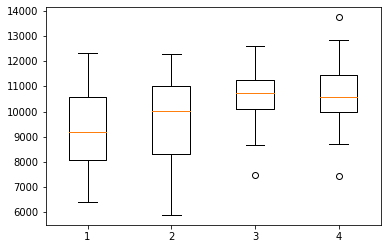

In [109]:
plt.boxplot([tempDat[:,0],tempDat[:,1],tempDat[:,2],tempDat[:,3]])

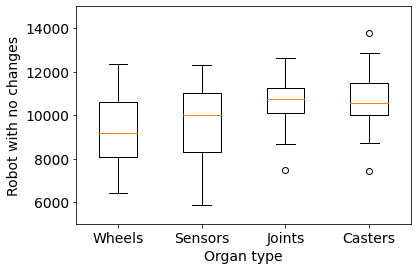

In [112]:
tempDat = np.array([[float(y) for y in x] for x in rep_quality_ratio]) # Convert to array
# Plot stuff
xValues = list(range(POPULATION, EVALUATIONS, POPULATION))
xValues = [x/POPULATION for x in xValues]
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

plt.boxplot([tempDat[:,0],tempDat[:,1],tempDat[:,2],tempDat[:,3]])
# plt.boxplot([lhs_sparseness_mean, clusterrand_sparseness_mean, clustersort_sparseness_mean])

plt.xlabel('Organ type')
plt.ylabel('Robot with no changes')

axes = plt.gca()
#axes.set_ylim([0.0,EVALUATIONS])
axes.set_ylim([5000,15000])

plt.xticks([1, 2, 3, 4], ['Wheels', 'Sensors', 'Joints', 'Casters'])

plt.savefig(REPOSITORY+'GenomeQuality.png',dpi=200)